In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
state_space = "ABCDEFG"
def generate_random_sequence():
    sequence = [[0,0,0,1,0,0,0]]
    state = 3
    state_length = 14
    while True:
        temp = [0,0,0,0,0,0,0]
        rand = np.random.uniform(0,1)
        if rand < 0.5:
            state -= 1
        else:
            state += 1
        if state < 0 or state > 6:
            break
        temp[state] = 1
        sequence.append(temp)
        state_length -= 1
        if state_length == 0:
            sequence = [[0,0,0,1,0,0,0]]
            state = 3
            state_length = 14
            continue
    reward = 0.
    if sequence[-1][-1] == 1:
        reward = 1.
    return sequence, reward

In [35]:
np.random.randn(27)
dataset = []
num_training_sets = 100
num_sequence = 10
for i in range(num_training_sets):
    dataset.append([generate_random_sequence() for j in range(num_sequence)])

In [4]:
dataset_copy = np.asarray(dataset)
def train(_lambda, alpha=0.01, epochs=25):
    w_hat = np.array([1/6., 1/3., 1/2., 2/3., 5/6.])
    rms_error = []
    for sequences in dataset_copy:
        w = np.ones(5) * 0.5
        dw = np.zeros(5)
        for epoch in range(epochs):
            for sequence in sequences:
                reward = sequence[1]
                t_sequence = np.array(sequence[0])[:-1, 1:-1]
                _lc = [1.]
                for no, state in enumerate(t_sequence):
                    if no == len(t_sequence) - 1:
                        dp = reward - np.dot(w, state)
                    else:
                        dp = np.dot(w, t_sequence[no + 1]) - np.dot(w, state)
                    dw += alpha * dp * np.sum(t_sequence[:no+1] * np.array(_lc)[:, None] , axis=0)
                    _lc = [l * _lambda for l in _lc]
                    _lc += [1.]
        w += dw
        rms_error.append(np.sqrt(np.mean( (w - w_hat) ** 2 )))
    return np.mean(rms_error)


In [5]:
_lambdas = [0,0.1,0.3,0.5,0.7,0.9,1.]
rms_values = [train(_lambda) for _lambda in _lambdas]

In [6]:
rms_values

[0.33049870328313596,
 0.30969271338746507,
 0.2958208356404798,
 0.3323972177544259,
 0.44350142725613245,
 0.7083449698988297,
 0.9818015435481477]

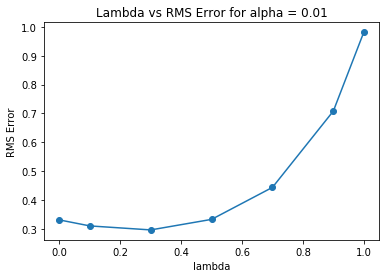

In [7]:
plt.xlabel('lambda')
plt.ylabel('RMS Error')
plt.title('Lambda vs RMS Error for alpha = 0.01')
plt.plot(_lambdas, np.array(rms_values), linestyle='-', marker='o')
plt.show()

In [42]:
dataset_copy = np.asarray(dataset)
def train(_lambda, alpha):
    w_hat = np.array([1/6., 1/3., 1/2., 2/3., 5/6.])
    rms_error = 0.
    for sequences in dataset_copy:
        w = np.ones(5) * 0.5
        for sequence in sequences:
            dw = np.zeros(5)
            _lc = [1.]
            reward = sequence[1]
            t_sequence = np.array(sequence[0])[:-1, 1:-1]
            for no, state in enumerate(t_sequence):
                if no == len(t_sequence) - 1:
                    dp = reward - np.dot(w, state)
                else:
                    dp = np.dot(w, t_sequence[no + 1]) - np.dot(w, state)
                dw += alpha * dp * np.sum(np.asarray(_lc)[:, None] * t_sequence[:no+1] , axis=0)
                _lc = [l * _lambda for l in _lc]
                _lc += [1.]
            w += dw
            rms_error += np.sqrt(np.mean( (w - w_hat) ** 2 ))
    return rms_error/1000.

rms_values = {}
alphas = np.array(list(range(13))) * .05
print(alphas)
_lambdas = [0., 0.3, 0.8, 1.]
for _lambda in _lambdas:
    rms_values[_lambda] = [train(_lambda, alpha) for alpha in alphas]


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6 ]


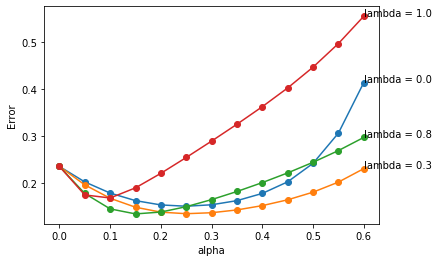

In [43]:
plt.xlabel('alpha')
plt.ylabel('Error')
for _lambda, rms_value in rms_values.items():
    plt.plot(np.array(alphas), np.array(rms_value), linestyle='-', marker='o')
    plt.annotate("lambda = {}".format(_lambda), (0.6, rms_value[-1]))
plt.show()
# rms_values

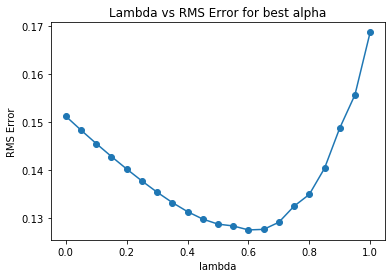

In [65]:
rms_values_1 = []
alphas = np.array(list(range(21))) * 0.05
_lambdas = np.array(list(range(21))) * 0.05
for _lambda in _lambdas:
    rms_values_1.append(np.min([train(_lambda, alpha) for alpha in alphas]))

plt.xlabel('lambda')
plt.ylabel('RMS Error')
plt.xticks(np.arange(0,1.2,0.2))
plt.title('Lambda vs RMS Error for best alpha')
plt.plot(_lambdas, rms_values_1, linestyle='-', marker='o')
plt.show()

In [63]:
rms_values_1

[0.15432180283205996,
 0.1508727608429941,
 0.1477050580080313,
 0.14477972112287416,
 0.14208425249681741,
 0.139627945980121,
 0.13743986960964638,
 0.13557073356544722,
 0.1340979297929902,
 0.13313606409068687,
 0.13285088324510405,
 0.13346481671502608,
 0.13527100363346067,
 0.13867753638353222,
 0.14425735448489663,
 0.1467702937690264,
 0.14559522725914018,
 0.14589821220415272,
 0.14875337754790433,
 0.15568557147493056,
 0.16874502197590355]